# Lower Back Pain Symptoms Dataset

<strong> kaggle link: https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

Description
310 Observations, 13 Attributes (12 Numeric Predictors, 1 Binary Class Attribute - No Demographics)
   
The data comprises of 13 columns and 310 observations. 12 columns are numerical attributes of the spine/ back. The last column is the Status of the patient - Abnormal indicates presence of Back pain and Normal indicates no back pain. The intent is to predict the Status based on the 12 variables. 

Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. Typical sources of low back pain include:

The large nerve roots in the low back that go to the legs may be irritated
The smaller nerves that supply the low back may be irritated
The large paired lower back muscles (erector spinae) may be strained
The bones, ligaments or joints may be damaged
An intervertebral disc may be degenerating
An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort.

This data set is about to identify a person is abnormal or normal using collected physical spine details/data.

## Importing the Libraries.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import statsmodels.api as sm

## Reading the dataset

In [2]:
df=pd.read_csv('Dataset_spine.csv')

## Basic Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [4]:
del df['Unnamed: 13']
df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [5]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [6]:
df.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Status'],
      dtype='object')

In [7]:
df.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


<strong> Check the distribution of the Dependent variable (y column)

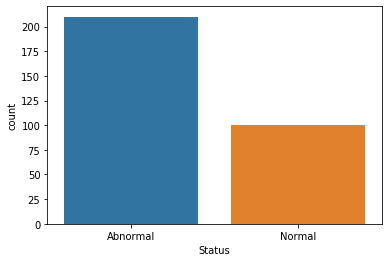

In [8]:
sns.countplot(x = 'Status', data =df)
plt.show()

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [10]:
##Checking for missing values. There are no missing values
print(df.isnull().sum())

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64


## Removing duplicates

In [11]:
# checking for duplicates.
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [pelvic_incidence, pelvic tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope, Status]
Index: []


# Outliers

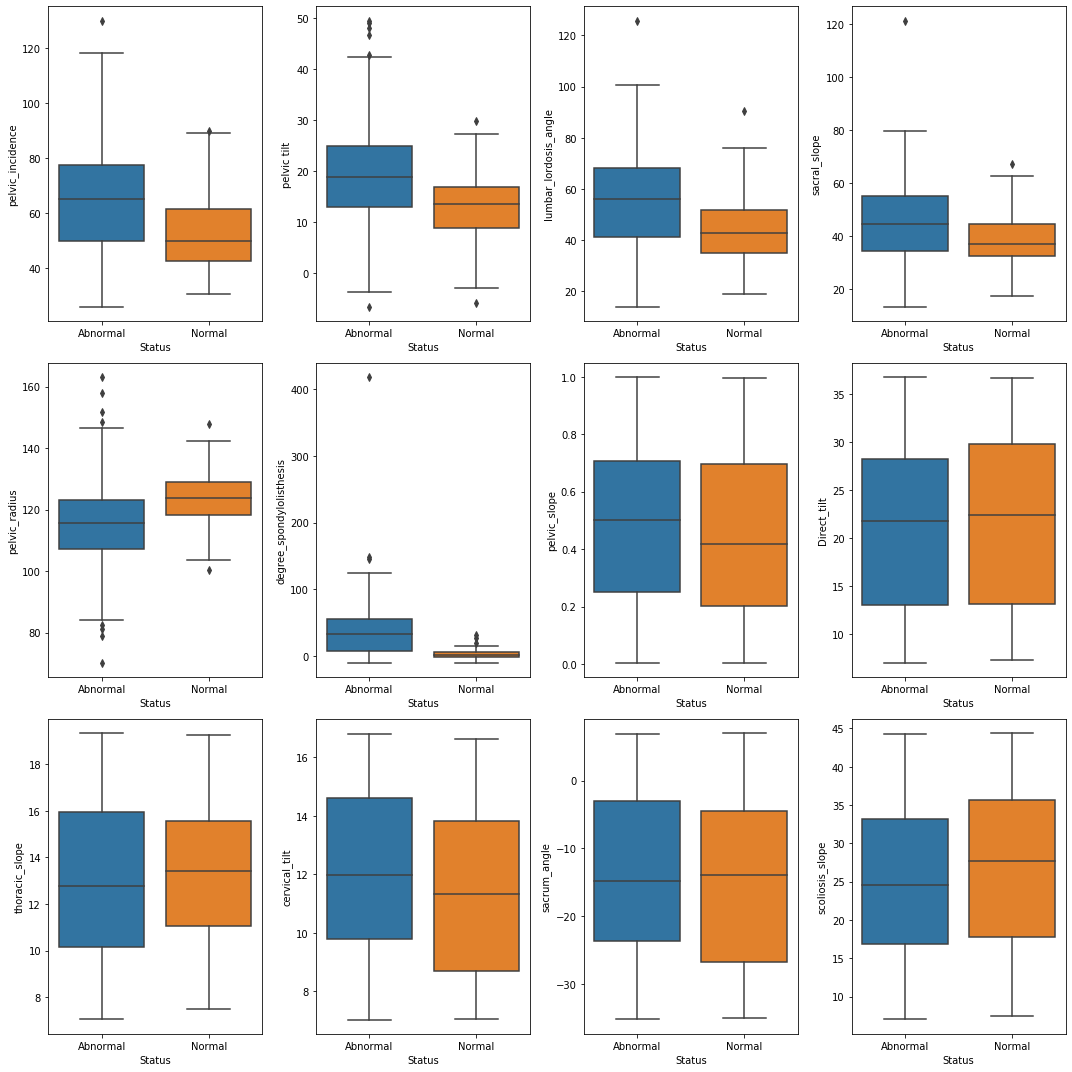

In [12]:
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(df.columns)-1):
    sns.boxplot(x="Status", y=df.iloc[:,i], data=df, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

In [13]:
# Removal of Outliers for the Newspaper column.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

pelvic_incidence            26.447401
pelvic tilt                 11.453326
lumbar_lordosis_angle       26.000000
sacral_slope                19.348766
pelvic_radius               14.758478
degree_spondylolisthesis    39.683625
pelvic_slope                 0.480479
Direct_tilt                 15.899675
thoracic_slope               5.471725
cervical_tilt                4.830670
sacrum_angle                20.792428
scoliosis_slope             16.790525
dtype: float64


In [14]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [15]:
df.shape

(310, 13)

In [16]:
df1.shape

(279, 13)

### Checking for corrrelation using Heat Map
## Heat Map can also be used for Multivariate analysis

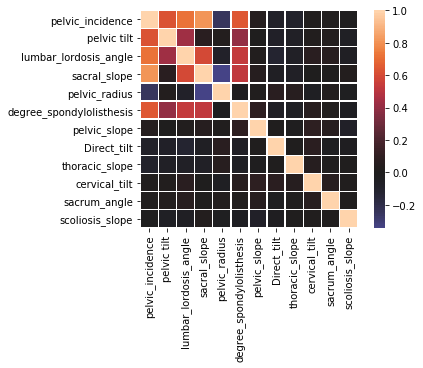

In [17]:
corr_df = df.corr()

# Generate the correlation plot 
sns.heatmap(corr_df, center=0, square=True, linewidths=.5)
plt.show()

In [18]:
# Seeing the correlation values
corr_df

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


#### Check for which independent variable (x) is important by seeing the distribution.
### By checking for the box plot for normal vs abnormal. 
### example only 1st 6 varaibles are important according to box plot as they show high diff in normal vs abnormal data

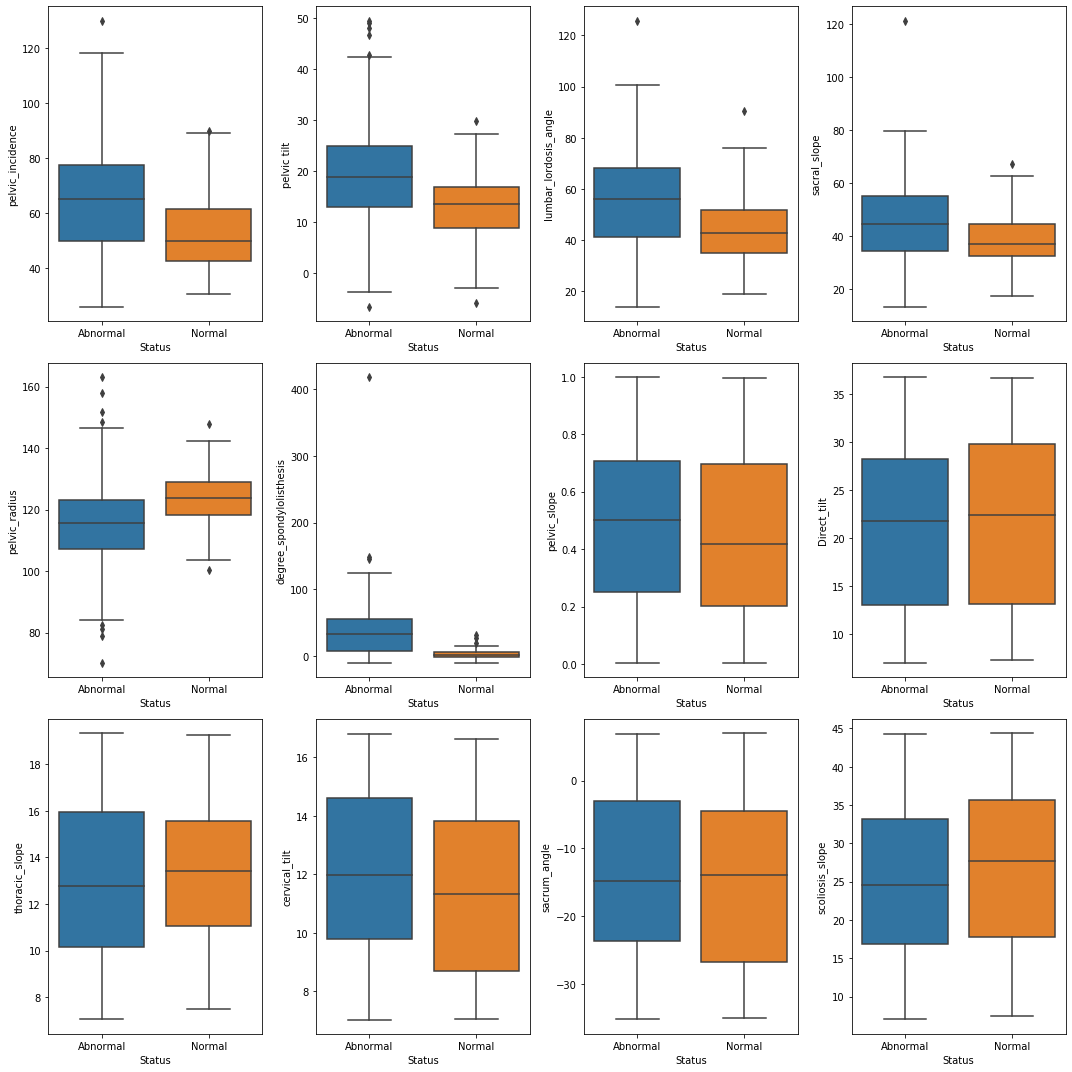

In [19]:
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(df.columns)-1):
    sns.boxplot(x="Status", y=df.iloc[:,i], data=df, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

## Check for linear scalability (only to apply the logistic model)

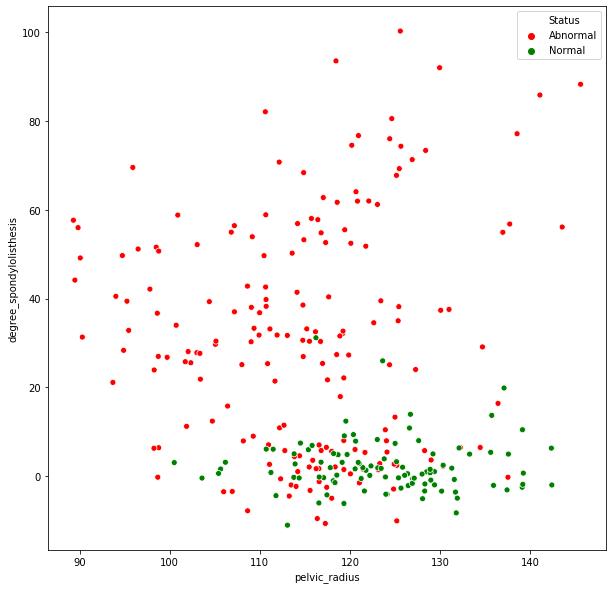

In [20]:
# Linear scalability is possible for pelvic_radius vs degree_spondylolisthesis
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pelvic_radius", y="degree_spondylolisthesis", hue = "Status", data = df1, palette =['red','green'])
plt.show()

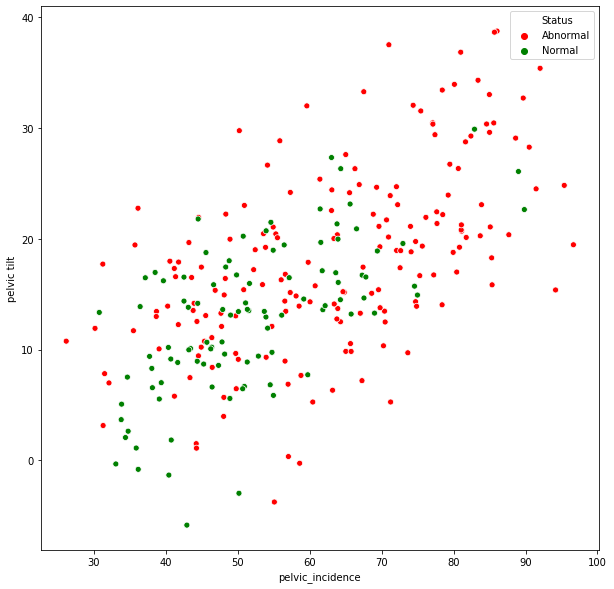

In [21]:
# Linear scalability is possible for "pelvic_incidence" vs "pelvic tilt",
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pelvic_incidence", y="pelvic tilt", hue = "Status", data = df1, palette =['red','green'])
plt.show()

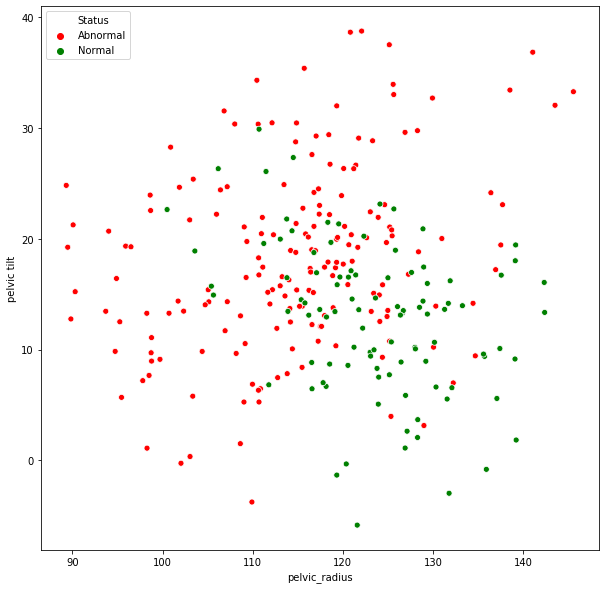

In [22]:
# Linear scalability is possible for pelvic_radius vs "pelvic tilt
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pelvic_radius", y="pelvic tilt", hue = "Status", data = df1, palette =['red','green'])
plt.show()

### Convert the abnormal to 1 and normal to 0.... thus converting categorical to numerical to pass in model. Model cannot take string input

In [23]:
df1.loc[df1.Status=='Abnormal','Status'] = 1
df1.loc[df1.Status=='Normal','Status'] = 0

C:\Users\ebineet\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
df['Status'].head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: Status, dtype: object

# Splitting the data-->Train Test Split

In [25]:
X = df1.loc[:, df1.columns != "Status"]
y = df1.loc[:, df1.columns == "Status"]

<strong>
train test slpit
 sclaing the data using normalisation
transform of the test and train x axis.
we do not scale the y we onlu scale x axis

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [30]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

In [31]:
logreg_result = logistic_regression(X_train_scaled, y_train)

In [32]:
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.821
Test set score: 0.821


## Checking the P value to know which individual features - which variable(s) influence the Target variable more

In [33]:
import statsmodels.api as sm

In [34]:
# While the previous model implemented was good in predicting the Target variable on a test set, 
# we did not interpret anything about the individual features - which variable(s) influence the Target variable more.

logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.449538
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.298     
Dependent Variable: y                AIC:              199.3197  
Date:               2021-03-26 11:16 BIC:              238.5957  
No. Observations:   195              Log-Likelihood:   -87.660   
Df Model:           11               LL-Null:          -124.80   
Df Residuals:       183              LLR p-value:      1.8592e-11
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1         0.0946        nan       nan      nan       nan       nan
x2         0.3270        nan       nan      nan       nan       nan
x3        -0.3096     0.38

C:\Users\ebineet\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ebineet\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


## Understanding the model result summary

 - The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular. 
 - In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.
 - Also in our statistical test results, the Standard error values are very high and p-value is 1 for these three variables. Hence we will remove them and re run the model. 

In [35]:
#Removing the highly correlated variables which also had high standard error
cols_to_include = [cols for cols in X.columns if cols not in ['lumbar_lordosis_angle', 'pelvic tilt','sacral_slope']]
X = df1[cols_to_include]

In [37]:
cols_to_include

['pelvic_incidence',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'pelvic_slope',
 'Direct_tilt',
 'thoracic_slope',
 'cervical_tilt',
 'sacrum_angle',
 'scoliosis_slope']

In [38]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.790
Test set score: 0.833


The test results indicate that the predictive power has gone down after removing the highly correlated variables. Let us look at the statistical summary below.

In [39]:
# to get the statistical summary of the new model
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.489427
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.235     
Dependent Variable: y                AIC:              208.8766  
Date:               2021-03-26 11:16 BIC:              238.3336  
No. Observations:   195              Log-Likelihood:   -95.438   
Df Model:           8                LL-Null:          -124.80   
Df Residuals:       186              LLR p-value:      8.2777e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.6110      0.2633    -2.3206    0.0203    -1.1270    -0.0949
x2    -0.9009      0.2267    -3.9733    0.0001    -1.3

In [40]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = df1.loc[:,['pelvic_radius','degree_spondylolisthesis']]

In [41]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.774
Test set score: 0.833


In [42]:
X_trim_1

,pelvic_radius,degree_spondylolisthesis
0,98.672917,-0.254400
1,114.405425,4.564259
2,105.985135,-3.530317
3,101.868495,11.211523
4,108.168725,7.918501
...,...,...
305,117.449062,-4.245395
306,114.365845,-0.421010
307,125.670725,-2.707880
308,118.545842,0.214750


In [43]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.507909
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.206     
Dependent Variable: y                AIC:              202.0845  
Date:               2021-03-26 11:16 BIC:              208.6305  
No. Observations:   195              Log-Likelihood:   -99.042   
Df Model:           1                LL-Null:          -124.80   
Df Residuals:       193              LLR p-value:      7.0898e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.7596      0.1982    -3.8318    0.0001    -1.1482    -0.3711
x2     1.1857      0.1993     5.9497    0.0000     0.7

In [44]:
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)


# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

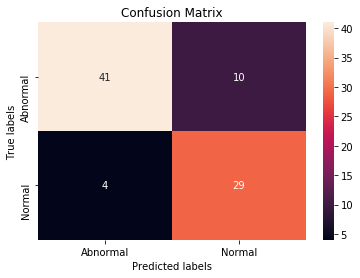

In [45]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

In [54]:
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Abnormal       0.74      0.88      0.81        33
      Normal       0.91      0.80      0.85        51

    accuracy                           0.83        84
   macro avg       0.83      0.84      0.83        84
weighted avg       0.85      0.83      0.84        84



In [47]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0])

### ROC

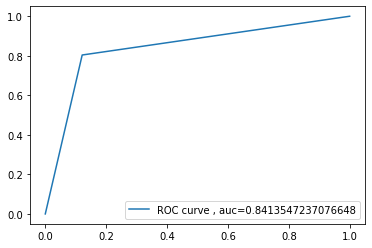

In [48]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

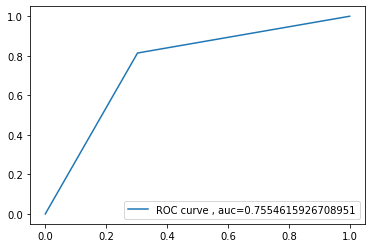

In [49]:
y_pred_train = logreg_result.predict(X_train_scaled)
fpr, tpr, threshholds = metrics.roc_curve(y_train,  y_pred_train)
auc = metrics.roc_auc_score(y_train,  y_pred_train)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [50]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [51]:
y_pred_train = logreg_result.predict_proba(X_train_scaled)

In [52]:
y_pred_train

array([[3.54339543e-01, 6.45660457e-01],
       [7.07167112e-01, 2.92832888e-01],
       [7.34068416e-01, 2.65931584e-01],
       [1.23570410e-01, 8.76429590e-01],
       [5.65002043e-01, 4.34997957e-01],
       [4.80897982e-03, 9.95191020e-01],
       [7.45922774e-01, 2.54077226e-01],
       [3.22044940e-01, 6.77955060e-01],
       [5.93410181e-02, 9.40658982e-01],
       [7.10820224e-01, 2.89179776e-01],
       [1.28946246e-01, 8.71053754e-01],
       [7.65601538e-01, 2.34398462e-01],
       [4.15856169e-02, 9.58414383e-01],
       [7.01521572e-01, 2.98478428e-01],
       [7.41018869e-01, 2.58981131e-01],
       [3.88034636e-03, 9.96119654e-01],
       [6.96488576e-01, 3.03511424e-01],
       [6.81529780e-01, 3.18470220e-01],
       [9.85412934e-03, 9.90145871e-01],
       [3.40415783e-03, 9.96595842e-01],
       [2.42331731e-01, 7.57668269e-01],
       [3.82195075e-03, 9.96178049e-01],
       [3.48622345e-02, 9.65137765e-01],
       [1.04961028e-01, 8.95038972e-01],
       [4.734492

In [ ]:
## ROC - With different threshholds 
## Scaling variants - Min max / No scale 